# Exercise 1: Parameter Counting and Memory Management (30 points)

Show your work for the following short-answer questions.

## part 1(a) Parameter counting (10 points)

A more advanced version of the CNN we trained may have three convolutional layers, each with $3 \times 3$ kernels, a stride of 2, and "same" padding.
The lowest (first) `Conv2D` layer outputs 100 feature maps, the middle layer outputs 200, and the top (last) one outputs 400 maps.
These operate on input images that are RGB images of $200 \times 300$ pixels.

Show that this network will comprise more than 800,000 parameters.

## part 1(b) Memory management (10 points)

The parameters in part 1(a) are typically represented using 32-bit floating point numbers.
Show that this network will require at least 12 MB of RAM when making a *prediction* for a single data instance (input image).

## part 1(c) Memory management in training(5 points)

How much RAM is needed if mini-batch *training* is used with batches of 50 images? (*Hint*: it is at least 500 MB.)

## part 1(d) RNN dimensions (5 points)

The input to an RNN layer must have three dimensions.
What does each input dimension represent?
And what do the outputs of the RNN layer represent?

For a convolutional layer in PyTorch:

$\text{params} = C_{\text{out}},(C_{\text{in}} \cdot k^2) + C_{\text{out}}$

Layer 1: $3 \rightarrow 100$

$\text{params}_1 = 100,(3\cdot 3^2) + 100$
$= 100,(27) + 100$
$= 2800$

Layer 2: $100 \rightarrow 200$

$\text{params}_2 = 200,(100\cdot 3^2) + 200$
$= 200,(900) + 200$
$= 180{,}200$

Layer 3: $200 \rightarrow 400$

$\text{params}_3 = 400,(200\cdot 3^2) + 400$
$= 400,(1800) + 400$
$= 720{,}400$

Total parameters

$\text{Total} = 2800 + 180{,}200 + 720{,}400 = 903{,}400$

Therefore, the network contains $\boxed{903{,}400 > 800{,}000}$ parameters.

Parameters are stored as 32-bit floats:

$32\ \text{bits} = 4\ \text{bytes}$

Parameter memory

$903{,}400 \times 4 = 3{,}613{,}600\ \text{bytes} \approx 3.45\ \text{MiB}$

Activation sizes

Input size:

$3 \times 200 \times 300 = 180{,}000\ \text{floats}$

After each stride-2 same convolution, spatial dimensions roughly halve.

After Conv1

Spatial size: $100 \times 150$

Feature map size:

$100 \times 100 \times 150 = 1{,}500{,}000\ \text{floats}$

Memory:

$= 1{,}500{,}000 \times 4 = 6.0\ \text{MB}$

After Conv2

Spatial size: $50 \times 75$

Feature map size:

$200 \times 50 \times 75 = 750000\ \text{floats}$

Memory:

$= 3.0\ \text{MB}$

After Conv3

Spatial size: $25 \times 38$

Feature map size:

$400 \times 25 \times 38 = 380000\ \text{floats}$

Memory:

$= 1.52\ \text{MB}$

Total inference memory (approx.)

Activations:

$6.0 + 3.0 + 1.52 \approx 10.5\ \text{MB}$

Add parameters and input:

$\text{Total} \approx 10.5 + 3.45 + 0.69 \approx 14.6\ \text{MB}$

Thus the network requires $\boxed{\gtrsim 12\ \text{MB}}$ of RAM for a single prediction.

During training, activations must be stored for every image in the batch.

Per image activation memory:

$\approx 10.0\ \text{MiB}$

For batch size $50$:

$50 \times 10.0 \approx 500\ \text{MiB}$

Therefore training requires at least
$\boxed{\gtrsim 500\ \text{MB}}$ of RAM.


Model parameters

From Part (a):

$903{,}400\ \text{params}$

Memory:

$903{,}400 \times 4 \approx 3.45\ \text{MB}$

Parameter gradients


Each RGB image contains

$3\times 200\times 300 = 180{,}000\ \text{floats}$

Per image memory:

$180{,}000 \times 4 = 0.72\ \text{MB}$

For batch size $50$:

$50 \times 0.72 \approx 36\ \text{MB}$


Per Image activations: $\approx 500\ \text{MB}$
Inputs: $\approx 36\ \text{MB}$
Parameters: $\approx 3.45\ \text{MB}$

$\boxed{\text{Training requires } \approx 540\ \text{MB of RAM}}$




In PyTorch, an RNN expects a 3-dimensional input tensor.

the shape is:

$(\text{batch},\ \text{sequence length},\ \text{input size})$

Batch dimension: number of sequences processed simultaneously

Sequence length: number of time steps in each sequence

Input size: number of features at each time step



An RNN layer returns an Output tensor with Shape:
$(\text{batch},\ \text{sequence length},\ \text{hidden size})$

This contains the hidden state at every time step.

Final hidden state Shape:
$(\text{num layers} \times \text{num directions},\ \text{batch},\ \text{hidden size})$

In [1]:
# PyTorch verification: e
import torch
import torch.nn as nn

# --- Model definition (same padding via padding=1 for 3x3 kernels) ---
class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,   out_channels=100, kernel_size=3, stride=2, padding=1, bias=True)
        self.conv2 = nn.Conv2d(in_channels=100, out_channels=200, kernel_size=3, stride=2, padding=1, bias=True)
        self.conv3 = nn.Conv2d(in_channels=200, out_channels=400, kernel_size=3, stride=2, padding=1, bias=True)

    def forward(self, x):
        a1 = self.conv1(x)
        a2 = self.conv2(a1)
        a3 = self.conv3(a2)
        return a1, a2, a3

model = TinyCNN()

# --- Parameter count (exact) ---
n_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", n_params)

# --- Confirm layer-by-layer too ---
for name, p in model.named_parameters():
    print(f"{name:15s} {p.numel():,}")

# --- Shape check + activation memory estimate for one image ---
x = torch.zeros(1, 3, 200, 300)  # (batch=1, channels=3, H=200, W=300)
a1, a2, a3 = model(x)

print("\nActivation shapes:")
print("a1:", tuple(a1.shape))
print("a2:", tuple(a2.shape))
print("a3:", tuple(a3.shape))

# --- Memory estimates (float32 = 4 bytes) ---
BYTES_PER_FLOAT = 4

param_bytes = n_params * BYTES_PER_FLOAT
input_bytes = x.numel() * BYTES_PER_FLOAT
act_bytes = (a1.numel() + a2.numel() + a3.numel()) * BYTES_PER_FLOAT

def bytes_to_mib(b):
    return b / (1024**2)

print("\n--- Rough RAM (MiB) for batch=1 inference ---")
print(f"Parameters:  {bytes_to_mib(param_bytes):.2f} MiB")
print(f"Input:       {bytes_to_mib(input_bytes):.2f} MiB")
print(f"Activations: {bytes_to_mib(act_bytes):.2f} MiB")
print(f"Total:       {bytes_to_mib(param_bytes + input_bytes + act_bytes):.2f} MiB")

# --- Batch=50 training lower bound (inputs + activations) ---
batch = 50
xB = torch.zeros(batch, 3, 200, 300)
a1B, a2B, a3B = model(xB)

input_bytes_B = xB.numel() * BYTES_PER_FLOAT
act_bytes_B = (a1B.numel() + a2B.numel() + a3B.numel()) * BYTES_PER_FLOAT

print("\n--- Lower-bound RAM (MiB) for batch=50 forward storage ---")
print(f"Input batch:       {bytes_to_mib(input_bytes_B):.2f} MiB")
print(f"Activation batch:  {bytes_to_mib(act_bytes_B):.2f} MiB")
print(f"Input+Activations: {bytes_to_mib(input_bytes_B + act_bytes_B):.2f} MiB")

# Add params + param grads for a slightly less-naive lower bound:
param_grads_bytes = param_bytes  # one gradient per parameter (same size)
print(f"+ params + grads:  {bytes_to_mib(input_bytes_B + act_bytes_B + param_bytes + param_grads_bytes):.2f} MiB")


Total parameters: 903400
conv1.weight    2,700
conv1.bias      100
conv2.weight    180,000
conv2.bias      200
conv3.weight    720,000
conv3.bias      400

Activation shapes:
a1: (1, 100, 100, 150)
a2: (1, 200, 50, 75)
a3: (1, 400, 25, 38)

--- Rough RAM (MiB) for batch=1 inference ---
Parameters:  3.45 MiB
Input:       0.69 MiB
Activations: 10.03 MiB
Total:       14.17 MiB

--- Lower-bound RAM (MiB) for batch=50 forward storage ---
Input batch:       34.33 MiB
Activation batch:  501.63 MiB
Input+Activations: 535.96 MiB
+ params + grads:  542.86 MiB


# Exercise 2: CNN Training for Quantum State Classification (35 points)

In this exercise you will train a CNN on a dataset of quantum states for a particle in a 1-d box of length $L$.

The goal is to identify the quantum index of the eigenfunction: $n=1,2,3,\ldots$, or the dominant eigenfunction for a mixed state.

*Bonus question: why is the CNN a better choice for this challenge than a RNN?*



## Generate dataset

We give you the dataset generator so that everyone has a similar dataset.

The basic spatial eigenfunction is
$\psi(x) = \sqrt{\frac{2}{L}} \sin(n\pi x/L),$
but that is too simple to learn, so we add some Gaussian noise to the function to make it challenging.

In [2]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

np.random.seed(42)
torch.manual_seed(42)

# Parameters for the simulation
NUM_POINTS = 256          # points in the spatial function
NUM_CLASSES = 5           # quantum numbers n = 1 through 5
NOISE_STD = 0.3               # std of Gaussian noise to add

def generate_noisy_pinb(n_samples, noise_std=NOISE_STD, L=1.0):
    """Generate noisy wavefunctions for Particle In Box
       with known box length L."""
    x = np.linspace(0, L, NUM_POINTS, endpoint=False)
    X = np.zeros((n_samples, NUM_POINTS))
    y = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        n = np.random.randint(1, NUM_CLASSES + 1)          # n = 1…5
        psi = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
        X[i] = psi + np.random.normal(0, noise_std, NUM_POINTS)
        y[i] = n - 1                                       # class index 0…4
    return X, y

def make_data_loaders(generate_fn, n_train=5000, n_val=1000, batch_size=64):
    """Generate data with some `generate_fn` and wrap in DataLoaders."""
    X_train, y_train = generate_fn(n_train)
    X_val,   y_val   = generate_fn(n_val)

    # Reshape to (N, 1, NUM_POINTS) for Conv1d
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_val   = torch.tensor(X_val,   dtype=torch.float32).unsqueeze(1)
    y_val   = torch.tensor(y_val,   dtype=torch.long)

    train_ds = TensorDataset(X_train, y_train)
    val_ds   = TensorDataset(X_val,   y_val)
    return (DataLoader(train_ds, batch_size, shuffle=True),
            DataLoader(val_ds,   batch_size))

train_loader, val_loader = make_data_loaders(generate_noisy_pinb)


Using device: cpu


## part 2(a): Check the dataset (5 points)

Plot the first 5 inputs in the `train_loader` as spatial functions, just to check that they look reasonable.

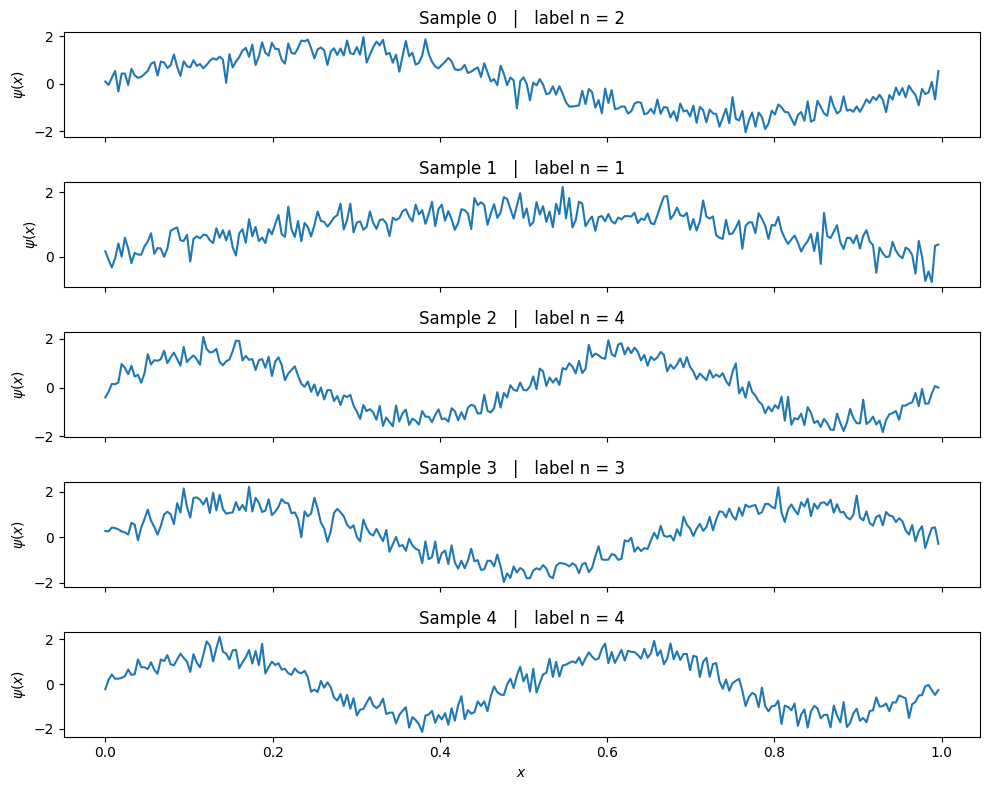

In [3]:
import matplotlib.pyplot as plt

# Look at batch 0 to extract the first few samples
for i, (X_batch, y_batch) in enumerate(train_loader):
    if i == 0:
        # Add your code to plot the first 5 inputs in X_batch and y_batch
        # X_batch shape: (batch, 1, NUM_POINTS)
        # y_batch shape: (batch,)
        x = np.linspace(0, 1.0, NUM_POINTS, endpoint=False)  # L=1.0 matches generator default

        fig, axes = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
        for j in range(5):
            psi = X_batch[j, 0].numpy()          # (NUM_POINTS,)
            n_label = int(y_batch[j].item()) + 1 # classes 0..4 correspond to n=1..5

            axes[j].plot(x, psi)
            axes[j].set_ylabel(r"$\psi(x)$")
            axes[j].set_title(f"Sample {j}   |   label n = {n_label}")

        axes[-1].set_xlabel(r"$x$")
        plt.tight_layout()
        plt.show()
        break

## part 2(b): Construct CNN (10 points)

The CNN is based on the `Conv1d` object in PyTorch.

We have set up the first layer and the third layer.
- Now you add the second convolutional layer with a $5\times 5$ kernel and padding = 2.
- Explain why the last convolutional layer uses the *average* pooling method instead of the *maximum* pooling method.
- Explain what is happening with the `squeeze` in the `forward` function.



The missing hidden layer is a 1-D convolution with a $5\times 5$ kernel and padding $=2$. In PyTorch this corresponds to

At the last stage, we want to turn the final feature maps into a single global summary per channel before the linear classifier. Average pooling computes something like a “global mean" of each learned feature across space: it’s smoother and more stable to noise (important here because the wavefunctions are very noisey), it reflects the overall presence of a pattern, not just the single strongest spike.

Max pooling would keep only the single largest activation in each channel: hat can be overly sensitive to a random noisy fluctuation, it throws away information about how the feature is distributed across the domain. So average pooling is a better match when you want global, noise-robust feature summaries for classification.

After the features extractor , the tensor has shape (batch, 64,1). The last dimension has length $1$ because of the global pooling. The operation:

x.squeeze(-1)

removes this singleton dimension:
(batch, 64, 1)⟶(batch, 64).

This step is necessary because the linear classifier expects input of the form (batch, features). Without the squeeze operation, the tensor would have an extra dimension and would not be compatible.

In [4]:
import torch.nn as nn

class WavefunctionCNN(nn.Module):
    """1-D CNN particle-in-a-box wavefunctions."""

    def __init__(self, num_classes=NUM_CLASSES):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(2),

            # Add missing hidden layer here
            # Missing hidden layer (kernel 5, padding 2)
            nn.Conv1d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
        )
        self.classifier = nn.Linear(64, num_classes)

    def forward(self, x):
        # x shape: (batch, 1, NUM_POINTS)
        x = self.features(x)
        x = x.squeeze(-1)                     # (batch, 64)
        return self.classifier(x)


## part 2(c): Train CNN (5 points)

- Pick a reasonable criterion and optimizer for the CNN training and add them to the `train_model` function.
- What is the role of the `logits.argmax(1)` call inside the mini-batch training?
- Then train the CNN on the data loaders and plot the evolution of the loss and accuracy as a function of epoch.



In [6]:
import torch.optim as optim

def train_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    # Add your criterion and optimizer here
   # Criterion: multi-class classification with integer labels 0..4
    criterion = nn.CrossEntropyLoss()

    # Optimizer: Adam is a strong default for CNN training
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(10, epochs + 1):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
            optimizer.zero_grad()
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)
            # What does logits.argmax(1) do here?
            correct += (logits.argmax(1) == y_batch).sum().item()
            total += X_batch.size(0)

        history["train_loss"].append(running_loss / total)
        history["train_acc"].append(correct / total)

        # validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                val_correct += (logits.argmax(1) == y_batch).sum().item()
                val_total += X_batch.size(0)

        history["val_loss"].append(val_loss / val_total)
        history["val_acc"].append(val_correct / val_total)

        if epoch % 5 == 0 or epoch == 1:
            print(f"Epoch {epoch:3d}/{epochs}  "
                  f"train_loss={history['train_loss'][-1]:.4f}  "
                  f"val_acc={history['val_acc'][-1]:.3f}")

    return history

Epoch  10/30  train_loss=0.6412  val_acc=1.000
Epoch  15/30  train_loss=0.0012  val_acc=1.000
Epoch  20/30  train_loss=0.0003  val_acc=1.000
Epoch  25/30  train_loss=0.0001  val_acc=1.000
Epoch  30/30  train_loss=0.0001  val_acc=1.000


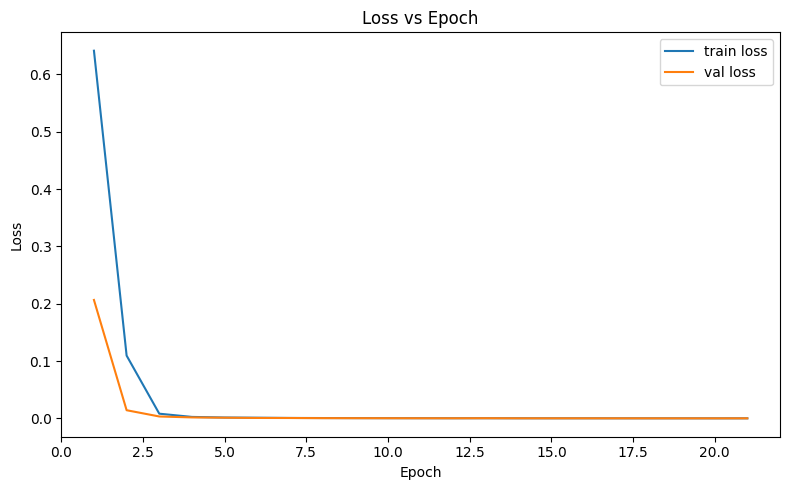

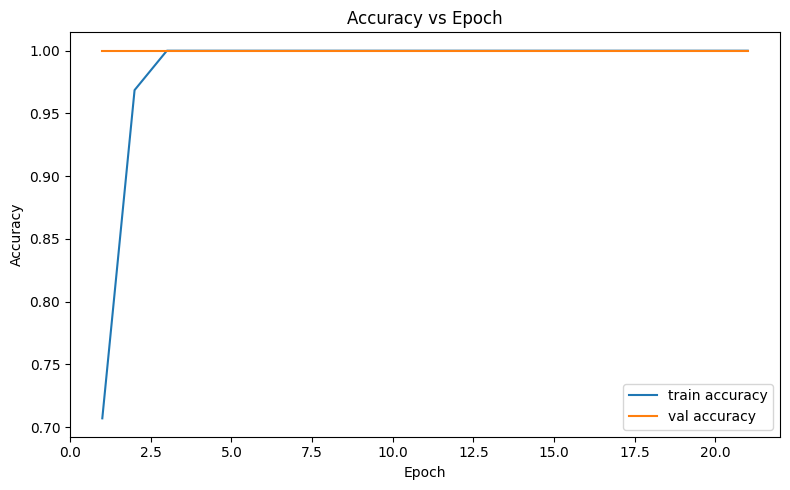

In [8]:
# Write your code here to train the network using the function definitions above.
# Use the train_loader and val_loader data.
# You can use the history output to make the plots of loss and accuracy
train_loader1, val_loader1 = make_data_loaders(generate_noisy_pinb)

# --- Train the network ---
train_loader1, val_loader1 = make_data_loaders(generate_noisy_pinb)

model = WavefunctionCNN(num_classes=NUM_CLASSES).to(DEVICE)
history = train_model(model, train_loader1, val_loader1, epochs=30, lr=1e-2)

# --- Plot loss and accuracy ---
epochs = range(1, len(history["train_loss"]) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history["train_loss"], label="train loss")
plt.plot(epochs, history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epoch")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, history["train_acc"], label="train accuracy")
plt.plot(epochs, history["val_acc"], label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epoch")
plt.tight_layout()
plt.show()


logits has shape (batch_size, num_classes).

Each row contains the model’s raw scores (logits) for classes 0..4 (i.e., n=1..5).

logits.argmax(1) means:
take the index of the largest logit along dimension 1 (the class dimension),
producing the model’s predicted class for each sample.

So it converts:
logits → predicted label indices (batch_size,)
and then we compare to the true labels y_batch to count correct predictions and compute accuracy.

## part 2(d) (5 points)

The next challenge for the CNN is to identify the different eigenstates even with varied box lengths.

To that end, we generate a new dataset with L values varying from 0.5 to 2.0, and we add the same Gaussian noise to each curve.

Add code to retrain the CNN using these new data and evaluate the performance. How do the results compare to the results from part 2(c)?

In [9]:
def generate_varying_L(n_samples, L_range=(0.5, 2.0), noise_std=0.3):
    """Generate wavefunctions with random box length L."""
    X = np.zeros((n_samples, NUM_POINTS))
    y = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        L = np.random.uniform(*L_range)
        n = np.random.randint(1, NUM_CLASSES + 1)
        # We always sample x in [0, L_max] and zero-pad outside [0, L]
        x = np.linspace(0, L_range[1], NUM_POINTS, endpoint=False)
        psi = np.where(x <= L,
                       np.sqrt(2 / L) * np.sin(n * np.pi * x / L),
                       0.0)
        X[i] = psi + np.random.normal(0, noise_std, NUM_POINTS)
        y[i] = n - 1
    return X, y

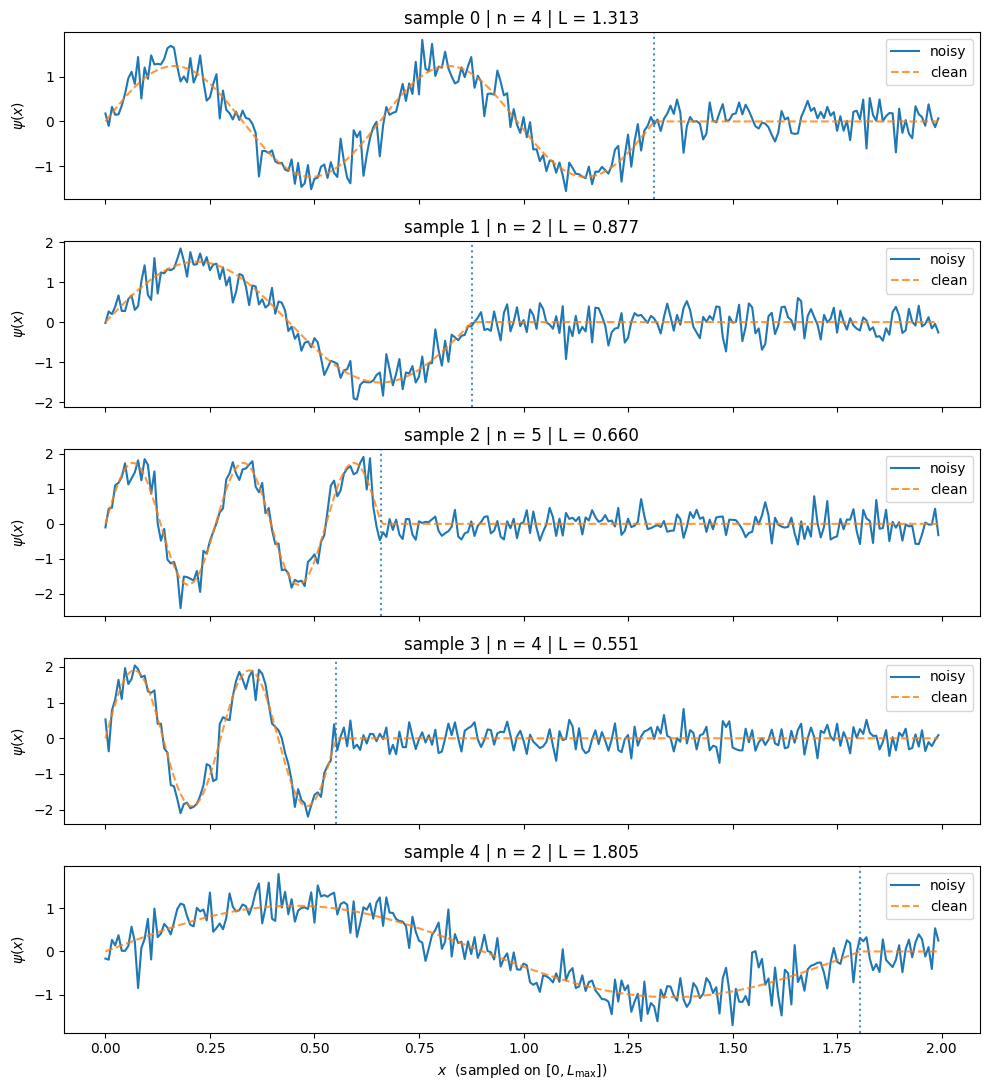

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_varying_L_samples(n_samples=5, L_range=(0.5, 2.0), noise_std=0.3):
    x = np.linspace(0, L_range[1], NUM_POINTS, endpoint=False)

    fig, axes = plt.subplots(n_samples, 1, figsize=(10, 2.2*n_samples), sharex=True)

    for j in range(n_samples):
        L = np.random.uniform(*L_range)
        n = np.random.randint(1, NUM_CLASSES + 1)

        psi_clean = np.where(
            x <= L,
            np.sqrt(2 / L) * np.sin(n * np.pi * x / L),
            0.0
        )
        psi_noisy = psi_clean + np.random.normal(0, noise_std, NUM_POINTS)

        axes[j].plot(x, psi_noisy, label="noisy")
        axes[j].plot(x, psi_clean, linestyle="--", label="clean", alpha=0.8)
        axes[j].axvline(L, linestyle=":", alpha=0.8)

        axes[j].set_title(f"sample {j} | n = {n} | L = {L:.3f}")
        axes[j].set_ylabel(r"$\psi(x)$")
        axes[j].legend(loc="upper right")

    axes[-1].set_xlabel(r"$x$  (sampled on $[0, L_{\max}]$)")
    plt.tight_layout()
    plt.show()

plot_varying_L_samples()


Epoch  10/30  train_loss=0.6227  val_acc=0.794
Epoch  15/30  train_loss=0.0150  val_acc=0.999
Epoch  20/30  train_loss=0.0022  val_acc=0.999
Epoch  25/30  train_loss=0.0074  val_acc=0.999
Epoch  30/30  train_loss=0.0015  val_acc=0.999


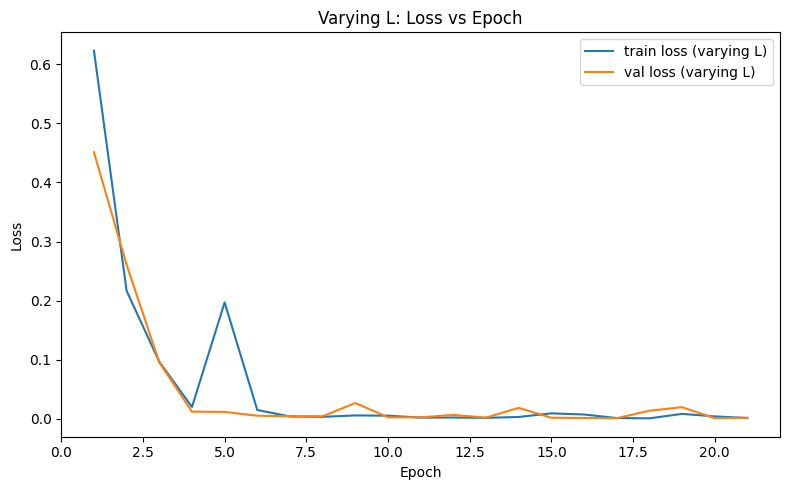

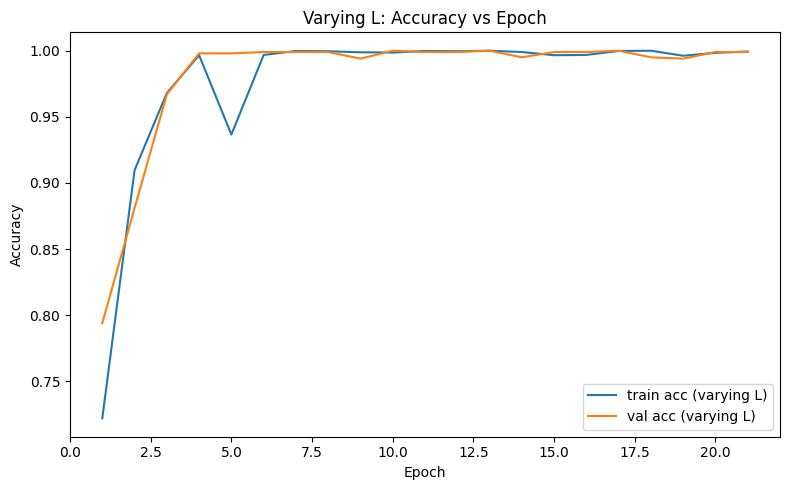


=== Summary ===
Part 2(c) (fixed L=1.0):
  final train acc: 1.000
  final val acc:   1.000
  best val acc:    1.000
Part 2(d) (varying L in [0.5,2.0]):
  final train acc: 0.999
  final val acc:   0.999
  best val acc:    1.000


In [11]:
# Write your code here to
# - put the generate_varying_L data into data loaders
# - use those data to retrain the CNN
# - use the history output to make the plots of loss and accuracy
# --- Part 2(d): retrain on varying L and evaluate ---

# 1) Make new dataloaders using the varying-L generator
train_loader_L, val_loader_L = make_data_loaders(generate_varying_L, n_train=5000, n_val=1000, batch_size=64)

# 2) Create a fresh model (don’t reuse the old one unless you explicitly want fine-tuning)
model_L = WavefunctionCNN(num_classes=NUM_CLASSES).to(DEVICE)

# 3) Train
history_L = train_model(model_L, train_loader_L, val_loader_L, epochs=30, lr=1e-2)

# 4) Plot loss + accuracy for varying-L training
epochs = range(1, len(history_L["train_loss"]) + 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epochs, history_L["train_loss"], label="train loss (varying L)")
plt.plot(epochs, history_L["val_loss"], label="val loss (varying L)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Varying L: Loss vs Epoch")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, history_L["train_acc"], label="train acc (varying L)")
plt.plot(epochs, history_L["val_acc"], label="val acc (varying L)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Varying L: Accuracy vs Epoch")
plt.tight_layout()
plt.show()

# 5) Quick numeric comparison to Part 2(c) results (if you still have `history` from 2(c))
def summarize_history(hist, name=""):
    best_val_acc = max(hist["val_acc"])
    final_val_acc = hist["val_acc"][-1]
    final_train_acc = hist["train_acc"][-1]
    print(f"{name}")
    print(f"  final train acc: {final_train_acc:.3f}")
    print(f"  final val acc:   {final_val_acc:.3f}")
    print(f"  best val acc:    {best_val_acc:.3f}")

print("\n=== Summary ===")
if "history" in globals():
    summarize_history(history,   name="Part 2(c) (fixed L=1.0):")
summarize_history(history_L, name="Part 2(d) (varying L in [0.5,2.0]):")



In 2(c)  we fixed $L=1$, the CNN can find spatial frequency patterns at a fixed scale, so it usually reaches very high validation accuracy quickly.

In 2(d) We vary $L$, the same $n$ can appear “stretched/compressed” in $x$ because the wavelength depends on $L$. That makes the classification task harder for a plain CNN, here we get: slower learning, lower validation accuracy (often noticeably), possibly a bigger train–val gap if it starts overfitting.


## part 2(e) (5 points)

Now for the biggest challenge of all.

Each sample is now a normalized superposition

$$\Psi(x) = \alpha\,\psi_m(x) + \beta\,\psi_n(x), \qquad \alpha^2 + \beta^2 = 1$$

where $m \neq n$ are drawn at random and $|\alpha| > |\beta|$ by construction.
The label is the **dominant** quantum number $m$.

The CNN will have to figure out the dominant quantum number.

This is significantly harder than the previous challenges because the CNN must disentangle overlapping spatial
frequencies.

Use the function below to generate the data; then retrain the CNN to find the dominant quantum number.


In [12]:
def generate_superposition(n_samples, L=1.0, noise_std=0.05):
    """Generate superpositions of two states; label = dominant n."""
    x = np.linspace(0, L, NUM_POINTS, endpoint=False)
    X = np.zeros((n_samples, NUM_POINTS))
    y = np.zeros(n_samples, dtype=int)

    for i in range(n_samples):
        # Pick two distinct quantum numbers
        m, n = np.random.choice(range(1, NUM_CLASSES + 1), size=2, replace=False)

        # Random mixing angle; ensure |alpha| > |beta|
        theta = np.random.uniform(0, np.pi / 4)     # alpha = cos θ ≥ cos(π/4) ≈ 0.71
        alpha, beta = np.cos(theta), np.sin(theta)

        psi_m = np.sqrt(2 / L) * np.sin(m * np.pi * x / L)
        psi_n = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
        psi   = alpha * psi_m + beta * psi_n

        X[i] = psi + np.random.normal(0, noise_std, NUM_POINTS)
        y[i] = m - 1        # dominant quantum number

    return X, y


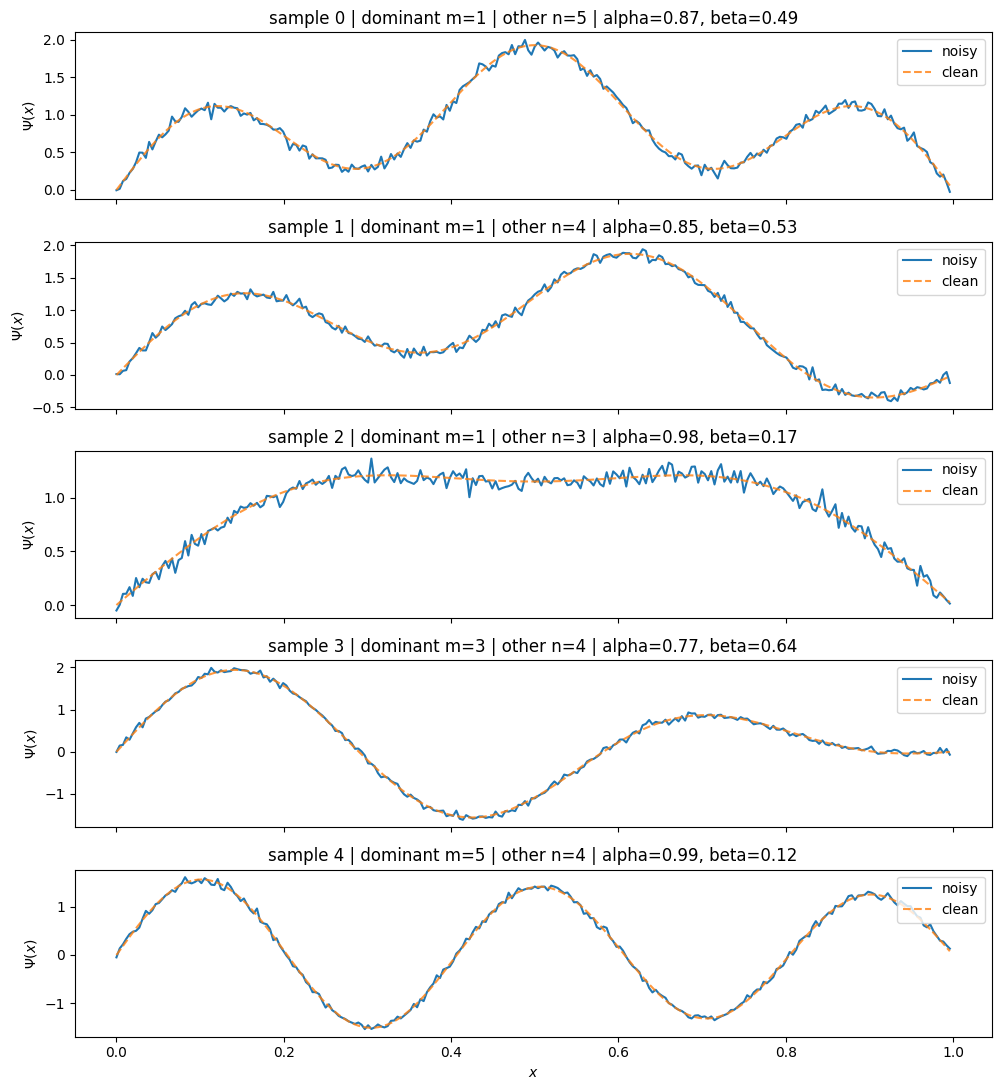

In [13]:

def plot_superposition_samples(n_samples=5, L=1.0, noise_std=0.05):
    x = np.linspace(0, L, NUM_POINTS, endpoint=False)
    fig, axes = plt.subplots(n_samples, 1, figsize=(10, 2.2*n_samples), sharex=True)

    for j in range(n_samples):
        m, n = np.random.choice(range(1, NUM_CLASSES + 1), size=2, replace=False)
        theta = np.random.uniform(0, np.pi/4)
        alpha, beta = np.cos(theta), np.sin(theta)

        psi_m = np.sqrt(2 / L) * np.sin(m * np.pi * x / L)
        psi_n = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
        psi_clean = alpha * psi_m + beta * psi_n
        psi_noisy = psi_clean + np.random.normal(0, noise_std, NUM_POINTS)

        axes[j].plot(x, psi_noisy, label="noisy")
        axes[j].plot(x, psi_clean, linestyle="--", alpha=0.8, label="clean")
        axes[j].set_ylabel(r"$\Psi(x)$")
        axes[j].set_title(f"sample {j} | dominant m={m} | other n={n} | alpha={alpha:.2f}, beta={beta:.2f}")
        axes[j].legend(loc="upper right")

    axes[-1].set_xlabel(r"$x$")
    plt.tight_layout()
    plt.show()

plot_superposition_samples()


Epoch  10/55  train_loss=1.0996  val_acc=0.447
Epoch  15/55  train_loss=0.1841  val_acc=0.942
Epoch  20/55  train_loss=0.1148  val_acc=0.953
Epoch  25/55  train_loss=0.0804  val_acc=0.973
Epoch  30/55  train_loss=0.0701  val_acc=0.976
Epoch  35/55  train_loss=0.0452  val_acc=0.992
Epoch  40/55  train_loss=0.0243  val_acc=0.987
Epoch  45/55  train_loss=0.0406  val_acc=0.981
Epoch  50/55  train_loss=0.0357  val_acc=0.981
Epoch  55/55  train_loss=0.0288  val_acc=0.993


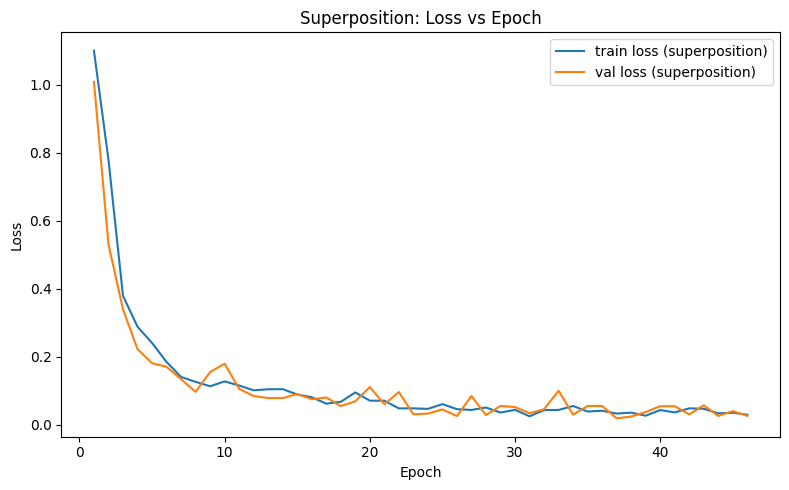

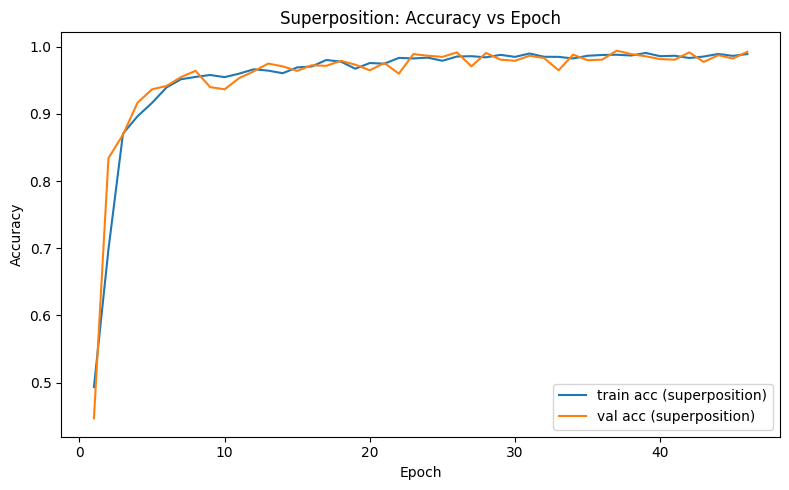

In [14]:
# Write your code here to
# - put the generate_superposition data into data loaders
# - use those data to retrain the CNN and plot results

# --- Part 2(e): train on superpositions and plot results ---

import matplotlib.pyplot as plt

# 1) Make dataloaders
train_loader_sup, val_loader_sup = make_data_loaders(
    generate_superposition,
    n_train=6000,   # a bit more data helps since this task is harder
    n_val=1200,
    batch_size=64
)

# 2) Fresh model
model_sup = WavefunctionCNN(num_classes=NUM_CLASSES).to(DEVICE)

# 3) Train (you can bump epochs if needed)
history_sup = train_model(model_sup, train_loader_sup, val_loader_sup, epochs=55, lr=1e-2)

# 4) Plot loss + accuracy
epochs = range(1, len(history_sup["train_loss"]) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, history_sup["train_loss"], label="train loss (superposition)")
plt.plot(epochs, history_sup["val_loss"], label="val loss (superposition)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Superposition: Loss vs Epoch")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, history_sup["train_acc"], label="train acc (superposition)")
plt.plot(epochs, history_sup["val_acc"], label="val acc (superposition)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Superposition: Accuracy vs Epoch")
plt.tight_layout()
plt.show()


## part 2(f) (5 points)

- Use `scikit-learn.confusion_matrix` to display the confusion matrix for the 5 labeled classes.
- Which states were most easily confused? Explain the reason for the confusion, using your knowledge of quantum mechanics.

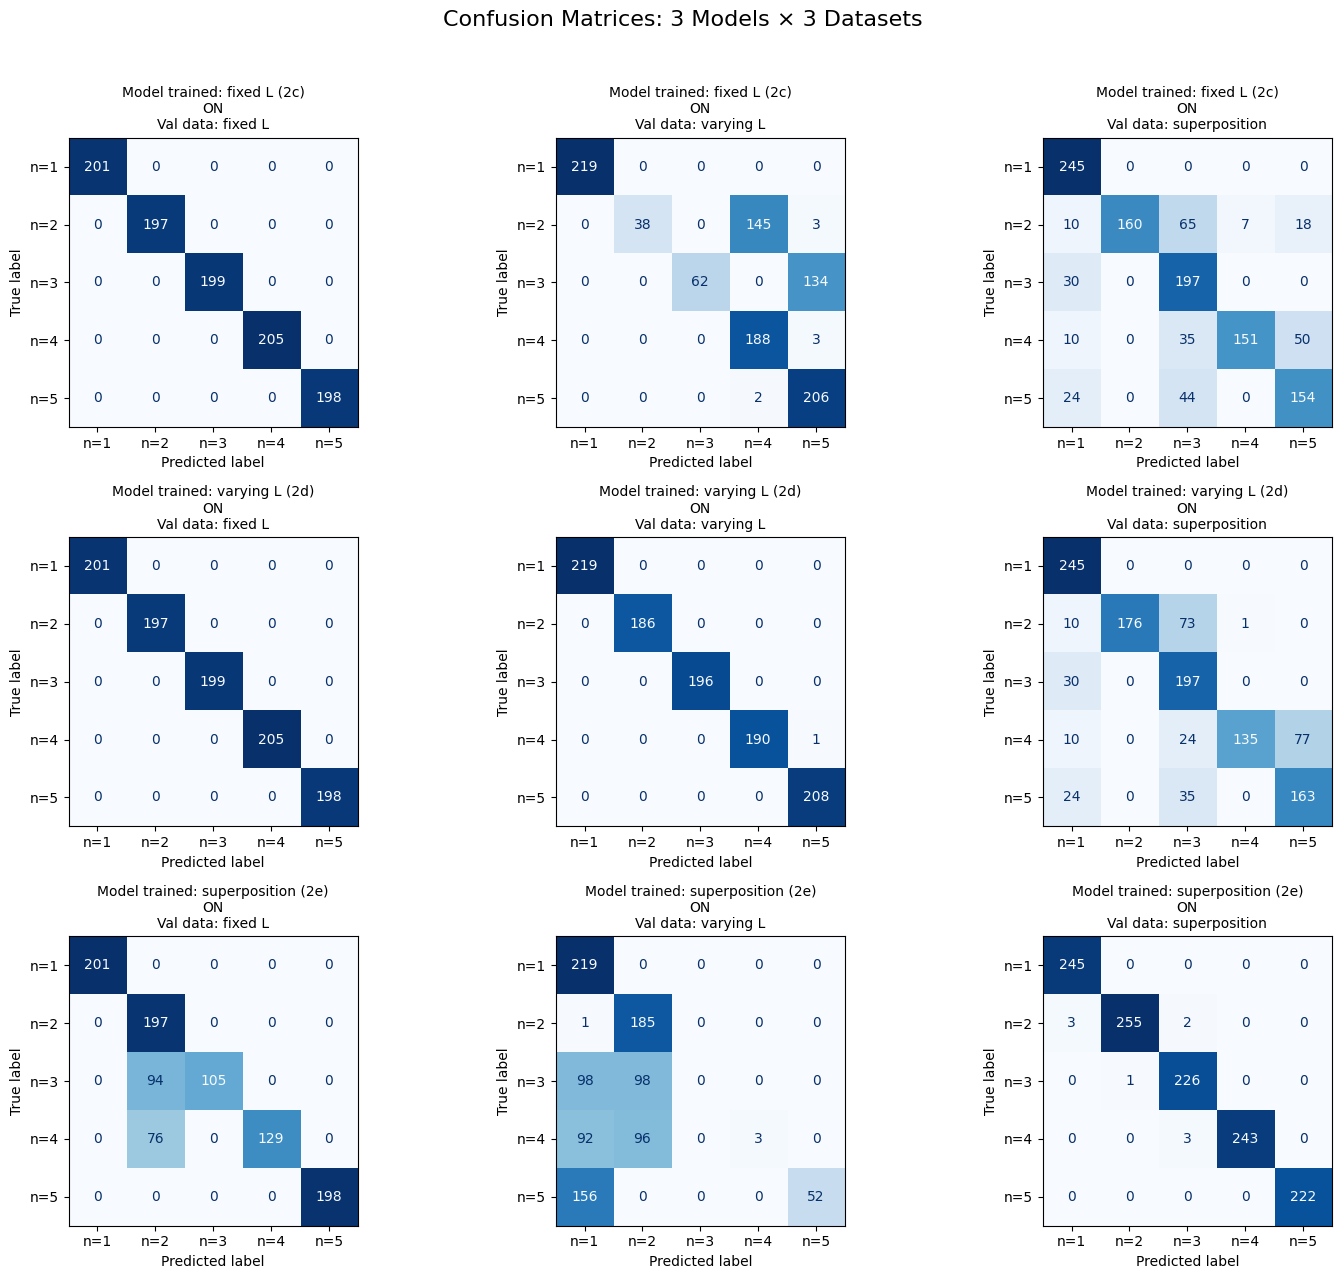


===== Top confusions (off-diagonal) for each model × dataset =====

Model trained: fixed L (2c)  |  Val data: fixed L
  No confusions (perfect diagonal).

Model trained: fixed L (2c)  |  Val data: varying L
   145: true n=2 -> pred n=4
   134: true n=3 -> pred n=5
     3: true n=4 -> pred n=5
     3: true n=2 -> pred n=5
     2: true n=5 -> pred n=4

Model trained: fixed L (2c)  |  Val data: superposition
    65: true n=2 -> pred n=3
    50: true n=4 -> pred n=5
    44: true n=5 -> pred n=3
    35: true n=4 -> pred n=3
    30: true n=3 -> pred n=1

Model trained: varying L (2d)  |  Val data: fixed L
  No confusions (perfect diagonal).

Model trained: varying L (2d)  |  Val data: varying L
     1: true n=4 -> pred n=5

Model trained: varying L (2d)  |  Val data: superposition
    77: true n=4 -> pred n=5
    73: true n=2 -> pred n=3
    35: true n=5 -> pred n=3
    30: true n=3 -> pred n=1
    24: true n=5 -> pred n=1

Model trained: superposition (2e)  |  Val data: fixed L
    94: tru

In [15]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_preds_and_labels(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(DEVICE)
            logits = model(X_batch)
            preds = logits.argmax(1).cpu().numpy()
            all_preds.append(preds)
            all_labels.append(y_batch.numpy())
    return np.concatenate(all_preds), np.concatenate(all_labels)

def top_confusions_from_cm(cm, k=5):
    cm_off = cm.copy()
    np.fill_diagonal(cm_off, 0)
    pairs = []
    for i in range(cm_off.shape[0]):
        for j in range(cm_off.shape[1]):
            if cm_off[i, j] > 0:
                pairs.append((cm_off[i, j], i+1, j+1))  # +1 to report n=1..5
    pairs.sort(reverse=True)
    return pairs[:k]

models = {
    "Model trained: fixed L (2c)": model,
    "Model trained: varying L (2d)": model_L,
    "Model trained: superposition (2e)": model_sup,
}

datasets = {
    "Val data: fixed L": val_loader1,     # or val_loader
    "Val data: varying L": val_loader_L,
    "Val data: superposition": val_loader_sup,
}

labels = list(range(NUM_CLASSES))
display_labels = [f"n={i}" for i in range(1, NUM_CLASSES+1)]

# --- Plot a 3x3 grid of confusion matrices ---
fig, axes = plt.subplots(len(models), len(datasets), figsize=(15, 13))
fig.suptitle("Confusion Matrices: 3 Models × 3 Datasets", fontsize=16)

all_results = {}  # store cm + top confusions for printing

for r, (mname, m) in enumerate(models.items()):
    for c, (dname, loader) in enumerate(datasets.items()):
        y_pred, y_true = get_preds_and_labels(m, loader)
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        all_results[(mname, dname)] = cm

        ax = axes[r, c]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
        disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format="d")
        ax.set_title(f"{mname}\nON\n{dname}", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Print top confusions for each pair (optional but very useful for part 2f writeups) ---
print("\n===== Top confusions (off-diagonal) for each model × dataset =====")
for (mname, dname), cm in all_results.items():
    tops = top_confusions_from_cm(cm, k=5)
    print(f"\n{mname}  |  {dname}")
    if len(tops) == 0:
        print("  No confusions (perfect diagonal).")
    else:
        for count, true_n, pred_n in tops:
            print(f"  {count:4d}: true n={true_n} -> pred n={pred_n}")


We generate the wavefunctions with the equation for a particle in a one-dimensional infinite square well. The quantum number $n$ directly controls the number of oscillations. Neighboring states $n$ and $n+1$ therefore have very similar wavelengths and differ only by one additional half-oscillation across the interval.

We see the effect of this in the matracies because neighboring $n$ states are easily confused. Close spatial frequencies are hard to separate under noise. The Gaussian noise perturbs the waveform, especially near the nodes which we see in our plots.  

Because adjacent eigenstates have very similar shapes, noise can distort a sample from state $n$ so that it more closely resembles state $n+1$. This makes classification between neighboring quantum numbers intrinsically more difficult.


Additonlally, the network observes the wavefunction only on a discrete grid of $256$ points. In discrete signal processing, nearby frequencies are harder to distinguish than widely separated ones. As a result, the CNN has limited ability to resolve small differences in spatial frequency, which again leads to confusion primarily between adjacent $n$ values.

As for the models, It appears the spatially varying L model preforms the best overall on the data sets. It seems like the superpostion model may encounter some overfitting problems with data sets that are not symmetric.

# Exercise 3: LSTM Training for Orbital Mechanics (35 points)

The LSTM can learn a series of positions of an orbiting body (Keplerian orbit).

In this exercise you will generate the orbital data and then train the `OrbitLSTM` to predict the orbit given a starting point and a few steps.



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


This is the code to generate the dataset.

At each step the state is a 4-dimensional vector:

$$\mathbf{s}(t) = (x,\; y,\; v_x,\; v_y)$$

The gravitational equations of motion (with $\mu = GM = 1$) are:

$$\ddot{x} = -\frac{x}{r^3}, \qquad \ddot{y} = -\frac{y}{r^3}, \qquad r = \sqrt{x^2 + y^2}$$

We derive initial conditions at perihelion (closest approach):

$$x_0 = a(1-e), \quad y_0 = 0, \quad v_{x,0} = 0, \quad v_{y,0} = \sqrt{\frac{\mu(1+e)}{a(1-e)}},$$

where $a$ is the semi-major axis and $e$ is the eccentricity.

In [17]:
def kepler_initial_conditions(a: float, e: float, mu: float = 1.0) -> np.ndarray:
    """
    Compute initial state vector [x, y, vx, vy] at perihelion for a
    Kepler orbit with semi-major axis `a` and eccentricity `e`.
    """
    r_peri = a * (1.0 - e)
    v_peri = np.sqrt(mu * (1.0 + e) / (a * (1.0 - e)))
    return np.array([r_peri, 0.0, 0.0, v_peri])

def gravitational_acceleration(pos: np.ndarray, mu: float = 1.0) -> np.ndarray:
    """
    Compute gravitational acceleration at position `pos`.
    """
    r = np.linalg.norm(pos)
    return -mu * pos / r**3

def integrate_orbit(state0: np.ndarray, dt: float, n_steps: int,
                    mu: float = 1.0) -> np.ndarray:
    """
    Integrate a 2D Kepler orbit using the Velocity Verlet method.
    """
    trajectory = np.zeros((n_steps + 1, 4))
    trajectory[0] = state0

    pos = state0[:2].copy()
    vel = state0[2:].copy()
    acc = gravitational_acceleration(pos, mu)

    for i in range(1, n_steps + 1):
        pos = pos + vel * dt + 0.5 * acc * dt**2
        acc_new = gravitational_acceleration(pos, mu)
        vel = vel + 0.5 * (acc + acc_new) * dt
        acc = acc_new
        trajectory[i] = np.concatenate([pos, vel])

    return trajectory

def generate_orbit_dataset(n_orbits: int = 500, steps_per_orbit: int = 300,
                            a_range: tuple = (0.8, 1.2),
                            e_range: tuple = (0.0, 0.2),
                            mu: float = 1.0) -> list:
    """
    Generate a list of orbital trajectories with random parameters.
    """
    orbits = []
    for _ in range(n_orbits):
        a = np.random.uniform(*a_range)
        e = np.random.uniform(*e_range)
        state0 = kepler_initial_conditions(a, e, mu)
        T_orbital = 2.0 * np.pi * a**1.5
        dt = T_orbital / steps_per_orbit
        traj = integrate_orbit(state0, dt, steps_per_orbit, mu)
        orbits.append(traj)
    return orbits

class OrbitDataset(Dataset):
    """
    PyTorch Dataset for next-step prediction on orbital trajectories.

    Each sample is:
        X: states[i : i + seq_len]          shape (seq_len, 4)
        Y: states[i + seq_len]              shape (4,)
    """

    def __init__(self, orbits: list, seq_len: int = 20):
        self.samples_X = []
        self.samples_Y = []
        for traj in orbits:
            for i in range(len(traj) - seq_len):
                self.samples_X.append(traj[i:i + seq_len])
                self.samples_Y.append(traj[i + seq_len])
        self.samples_X = np.array(self.samples_X, dtype=np.float32)
        self.samples_Y = np.array(self.samples_Y, dtype=np.float32)

    def __len__(self):
        return len(self.samples_X)

    def __getitem__(self, idx):
        return (torch.tensor(self.samples_X[idx]),
                torch.tensor(self.samples_Y[idx]))

In [18]:
# Generate the data
print("Generating training orbits...")
train_orbits = generate_orbit_dataset(n_orbits=400, steps_per_orbit=300)
print("Generating validation orbits...")
val_orbits = generate_orbit_dataset(n_orbits=100, steps_per_orbit=300)

SEQ_LEN = 30
train_dataset = OrbitDataset(train_orbits, seq_len=SEQ_LEN)
val_dataset = OrbitDataset(val_orbits, seq_len=SEQ_LEN)

print(f"Training samples:   {len(train_dataset):,}")
print(f"Validation samples: {len(val_dataset):,}")

Generating training orbits...
Generating validation orbits...
Training samples:   108,400
Validation samples: 27,100


We generate many orbits with randomised parameters, then package them for PyTorch. The RNN receives a window of `seq_len` consecutive states and predicts the next state.


The class `OrbitLSTM` defines the model to be trained.
1. An stacked LSTM encoder processes the input sequence.
2. A fully-connected head (last layer) maps the final hidden state to the predicted next state.

In [19]:
class OrbitLSTM(nn.Module):
    """
    LSTM model for next-step orbital state prediction.

    Parameters
    ----------
    input_size : int
        Dimensionality of the state vector (default 4).
    hidden_size : int
        Number of LSTM hidden units.
    num_layers : int
        Number of stacked LSTM layers.
    dropout : float
        Dropout between LSTM layers (only used if num_layers > 1).
    """

    def __init__(self, input_size: int = 4, hidden_size: int = 64,
                 num_layers: int = 3, dropout: float = 0.1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Parameters
        ----------
        x : Tensor of shape (batch, seq_len, 4)

        Returns
        -------
        Tensor of shape (batch, 4) — predicted next state.
        """
        lstm_out, _ = self.lstm(x)         # (batch, seq_len, hidden)
        last_hidden = lstm_out[:, -1, :]   # (batch, hidden)
        return self.fc(last_hidden)        # (batch, 4)


## part 3(a): Set up training (5 points)

The model is already set up for you. Now
- add your code to evaluate the average loss per epoch
- add an optimizer and scheduler suitable for LSTM model

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    """Train for one epoch. Returns average loss."""
    model.train()
    total_loss = 0.0
    for X_batch, Y_batch in dataloader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, Y_batch)
        loss.backward()

        # Optional but often helpful for RNN stability:
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)
    return total_loss / len(dataloader.dataset)


def evaluate(model, dataloader, loss_fn, device):
    """Evaluate on a dataset. Returns average loss."""
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, Y_batch in dataloader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            pred = model(X_batch)
            loss = loss_fn(pred, Y_batch)
            total_loss += loss.item() * X_batch.size(0)

    return total_loss / len(dataloader.dataset)


def train_model(model, train_loader, val_loader, n_epochs=30, lr=1e-3,
                loss_fn=None, device=device):
    """
    Full training loop with logging.

    Returns
    -------
    dict with keys 'train_losses' and 'val_losses'.
    """
    if loss_fn is None:
        loss_fn = nn.MSELoss()

    # Optimizer + scheduler
    #optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=3,
    threshold=1e-4,
    min_lr=1e-5
)



    history = {"train_losses": [], "val_losses": []}

    for epoch in range(1, n_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
        val_loss = evaluate(model, val_loader, loss_fn, device)

        scheduler.step(val_loss)

        history["train_losses"].append(train_loss)
        history["val_losses"].append(val_loss)

        if epoch % 5 == 0 or epoch == 1:
            current_lr = optimizer.param_groups[0]["lr"]
            print(f"Epoch {epoch:3d} | Train Loss: {train_loss:.6f} | "
                  f"Val Loss: {val_loss:.6f} | LR: {current_lr:.2e}")

    return history


## part 3(b): Train LSTM (10 points)

Train the LSTM with reasonable values of `num_layers`, `dropout`, and `hidden_size`.

You will need to evaluate the performance using the cells below.

In [50]:
# Create data loaders
BATCH_SIZE = 8*256
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Instantiate and train the baseline model with reasonable parameters
model_baseline = OrbitLSTM(input_size=4, hidden_size=32, num_layers=2, dropout=0.30).to(device)
print(f"Model parameters: {sum(p.numel() for p in model_baseline.parameters()):,}")
print("\nTraining baseline model (MSE loss)...")
history_baseline = train_model(model_baseline, train_loader, val_loader, n_epochs=20)


Model parameters: 14,500

Training baseline model (MSE loss)...
Epoch   1 | Train Loss: 0.329296 | Val Loss: 0.070753 | LR: 1.00e-03
Epoch   5 | Train Loss: 0.006546 | Val Loss: 0.005313 | LR: 1.00e-03
Epoch  10 | Train Loss: 0.005901 | Val Loss: 0.005064 | LR: 1.00e-03
Epoch  15 | Train Loss: 0.003082 | Val Loss: 0.002219 | LR: 1.00e-03
Epoch  20 | Train Loss: 0.001181 | Val Loss: 0.000737 | LR: 1.00e-03


## part 3(c): Evaluate training and validation loss (5 points)

Add your code inside `plot_training_curves` to plot the training and validation loss as a function of training epoch.

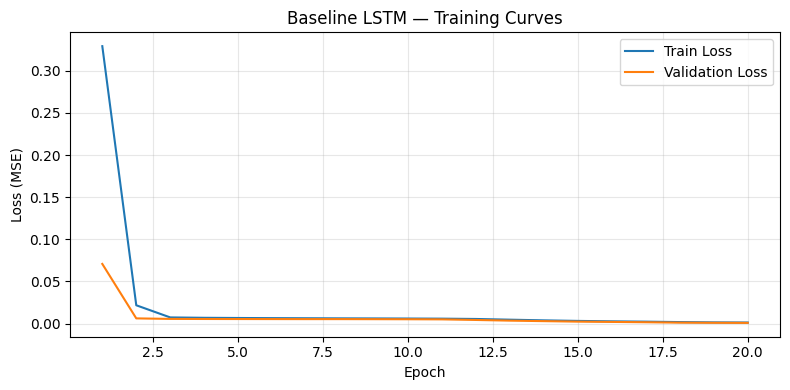

In [51]:
# Implement the function plot_training curves to plot the training loss
#  and validation loss as a function of training epoch


def plot_training_curves(history, title="Training Curves"):
    """Plot train and validation loss over epochs."""
    train_key = "train_losses" if "train_losses" in history else "train_loss"
    val_key   = "val_losses"   if "val_losses"   in history else "val_loss"

    train_losses = history[train_key]
    val_losses   = history[val_key]
    epochs = range(1, len(train_losses) + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(epochs, train_losses, label="Train Loss")
    ax.plot(epochs, val_losses, label="Validation Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss (MSE)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_training_curves(history_baseline, "Baseline LSTM — Training Curves")


The real test of the training is to give the model a starting sequence of points and have it map out an entire orbit. We can compare how well it matches the results from the equations of motion.

In [52]:
def rollout_trajectory(model, seed_states: np.ndarray, n_steps: int,
                       device=device) -> np.ndarray:
    """
    Autoregressively predict a trajectory.

    Parameters
    ----------
    model : OrbitLSTM
        Trained model.
    seed_states : np.ndarray of shape (seq_len, 4)
        Initial window of true states to seed the rollout.
    n_steps : int
        Number of additional steps to predict.
    device : torch.device

    Returns
    -------
    np.ndarray of shape (seq_len + n_steps, 4)
        The seed states followed by predicted states.
    """
    model.eval()
    seq_len = seed_states.shape[0]
    result = list(seed_states)

    window = torch.tensor(seed_states, dtype=torch.float32).unsqueeze(0).to(device)

    with torch.no_grad():
        for _ in range(n_steps):
            pred = model(window)                # (1, 4)
            pred_np = pred.cpu().numpy()[0]
            result.append(pred_np)
            # Slide window forward
            new_step = pred.unsqueeze(1)        # (1, 1, 4)
            window = torch.cat([window[:, 1:, :], new_step], dim=1)

    return np.array(result)


## part 3(d): Update training to optimize performance (15 points)

Test the model by plotting the prediction against the truth calculated by integrating the equations of motions.

Are you satisfied with the results? If not, go back and adjust some of the model parameters and training parameters until you are satisfied.

During this process you will need to think carefully about the LSTM:
- What is it learning?
- What are its limitations?
- What do the training vs. validation loss tell you?
- Are the test data in the plot well learned by the LSTM?

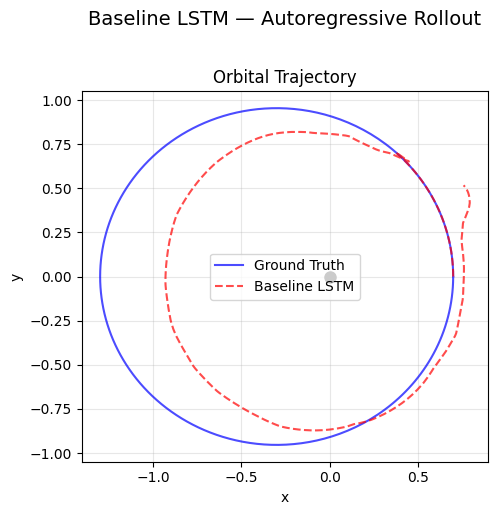

In [61]:
def evaluate_rollout(model, test_orbit: np.ndarray, seq_len: int = 20,
                     label: str = "Model"):
    """
    Roll out a prediction and plot trajectory
    compared to the ground truth.
    """
    n_predict = len(test_orbit) - seq_len
    seed = test_orbit[:seq_len]
    pred_traj = rollout_trajectory(model, seed, n_predict)
    fig, ax = plt.subplots(1, 1, figsize=(16, 5))

    # Trajectory
    ax.plot(test_orbit[:, 0], test_orbit[:, 1], 'b-', alpha=0.7, label='Ground Truth')
    ax.plot(pred_traj[:, 0], pred_traj[:, 1], 'r--', alpha=0.7, label=label)
    ax.plot(0, 0, 'ko', markersize=8)  # Central body
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Orbital Trajectory')
    ax.legend()
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

    plt.suptitle(f"{label} — Autoregressive Rollout", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# Generate a test orbit (moderate eccentricity)
a_test, e_test = 1.0, 0.3
state0_test = kepler_initial_conditions(a_test, e_test)
T_test = 2 * np.pi * a_test**1.5
test_orbit = integrate_orbit(state0_test, T_test / 300, 300)

baseline_metrics = evaluate_rollout(model_baseline, test_orbit, seq_len=SEQ_LEN,
                                     label="Baseline LSTM")





Model parameters: 1,132

Training tweaked model (MSE loss)...
Epoch   1 | Train Loss: 0.100624 | Val Loss: 0.008283 | LR: 1.00e-01
Epoch   5 | Train Loss: 0.006159 | Val Loss: 0.005165 | LR: 1.00e-01
Epoch  10 | Train Loss: 0.004286 | Val Loss: 0.003353 | LR: 1.00e-01
Epoch  15 | Train Loss: 0.003332 | Val Loss: 0.004537 | LR: 1.00e-01
Epoch  20 | Train Loss: 0.002900 | Val Loss: 0.002592 | LR: 1.00e-01
Epoch  25 | Train Loss: 0.001115 | Val Loss: 0.000743 | LR: 5.00e-02
Epoch  30 | Train Loss: 0.000623 | Val Loss: 0.000506 | LR: 5.00e-02
Epoch  35 | Train Loss: 0.000484 | Val Loss: 0.000393 | LR: 5.00e-02
Epoch  40 | Train Loss: 0.000446 | Val Loss: 0.000259 | LR: 5.00e-02
Epoch  45 | Train Loss: 0.000533 | Val Loss: 0.000577 | LR: 2.50e-02
Epoch  50 | Train Loss: 0.000260 | Val Loss: 0.000168 | LR: 2.50e-02


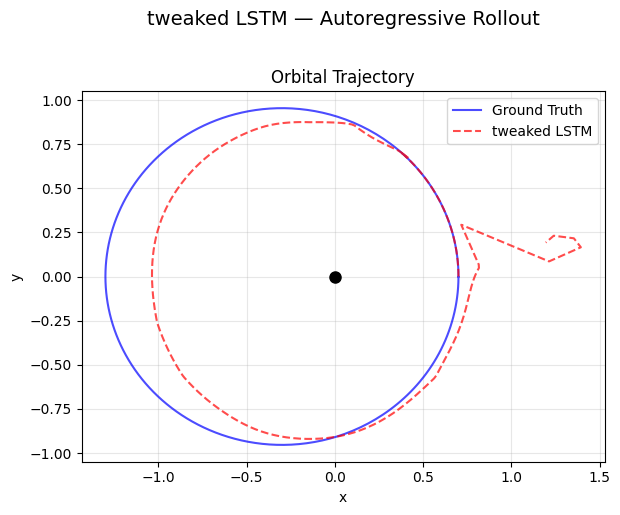

In [63]:
model_tweak = OrbitLSTM(input_size=4, hidden_size=8, num_layers=2, dropout=0.10, ).to(device)
print(f"Model parameters: {sum(p.numel() for p in model_tweak.parameters()):,}")
print("\nTraining tweaked model (MSE loss)...")
history_tweak = train_model(model_tweak, train_loader, val_loader, n_epochs=50, lr=1e-1)

tweak_metrics = evaluate_rollout(model_tweak, test_orbit, seq_len=SEQ_LEN,
                                     label="tweaked LSTM")

I have tried a bunch of differnt hyper paramter combonations and I cannot get this to converge $:($